# **CSE 5520 Homework 4**
## Visualization of t-Test, Clustering, Heatmap 

This homework is to help you practice with some data visualization fundamentals. You are expected to use these visualization techniques and others in your final project. You are required to do this exercise in Python. All plots/graphs must have titles and x-y coordinate tick labels. 


### **Part 1: t-Test**

Consider again the gene expression data sets introduced in Homework 3. Your analysis is limited to comparing the Dementia group (**GSE44768_CR_alz_female_reduced.csv**) and the Non-Dementia group (**GSE44768_CR_nd_female_reduced.csv**). Your study goal is to construct and contrast a 2 x 2 plot capturing various t-test outcomes for 2 genes, LAMP2 and BSN. In terms of the columns of the 2 x 2 plot, the first column is to show two histograms in one plot (red for Dementia and blue for non-Dementia for one gene) similar to what you practiced in Homework 3. The second column is to show t-Test PDF. The steps given below is to guide you how to do this exercise. 


**Step 1.** Create and show two histograms overlapped in one plot for the gene LAMP2 with different colors, red for the Dementia group and blue for the Non-Dementia group into one plot. It should be the first subplot of the first 1 x 2 plot. 


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sci
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

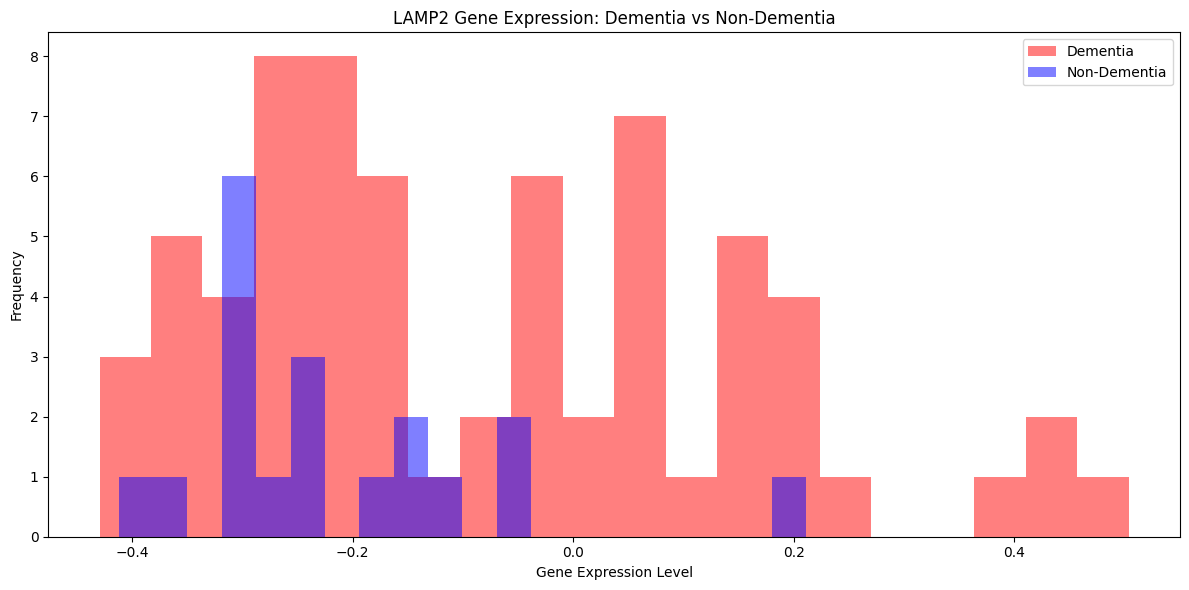

In [10]:
#Load the CSV Files again from the other Homework Assignment
dementia_data = pd.read_csv('GSE44768_CR_alz_female_reduced.csv')
non_dementia_data = pd.read_csv('GSE44768_CR_nd_female_reduced.csv')

# "overlapped in one plot for the gene LAMP2"
lamp2_dementia = dementia_data['LAMP2']
lamp2_non_dementia = non_dementia_data['LAMP2']

plt.figure(figsize=(12, 6))

# "Create and show two histograms overlapped in one plot for the gene LAMP2"
plt.hist(lamp2_dementia, bins=20, alpha=0.5, color='red', label='Dementia')
plt.hist(lamp2_non_dementia, bins=20, alpha=0.5, color='blue', label='Non-Dementia')

# Titling and Setup
plt.title('LAMP2 Gene Expression: Dementia vs Non-Dementia')
plt.xlabel('Gene Expression Level')
plt.ylabel('Frequency')

plt.legend()
plt.tight_layout()
plt.show()

**Step 2.** Perform t-Test (Hint, unequal variance, unequal sample size) and show PDF. In the PDF plot, indicate the critical region (significance level  = 0.05) by placing two dots, arrows or lines near the x-axes. You can even color the critical region (area) on the plot if you know how to do this **for extra credits (Note visual communication is the theme of this course)**. Coloring the critical region is not required. Then display tobs by placing a different colored dot, arrow or line near the x-axes. Using a markdown cell, state if you would reject H0 or not. H0 is “The mean values of gene expression between the Dementia group and Non-Dementia group among female patients are not different” and H1 is “The mean values of gene expression between the Dementia group and Non-Dementia group among female patients are different (one could be higher or lower than the other)”. This t-Test’s PDF is the second subplot of the first 1 x 2 plot. The plot title for the PDF should include the calculated DF (degrees of freedom). 



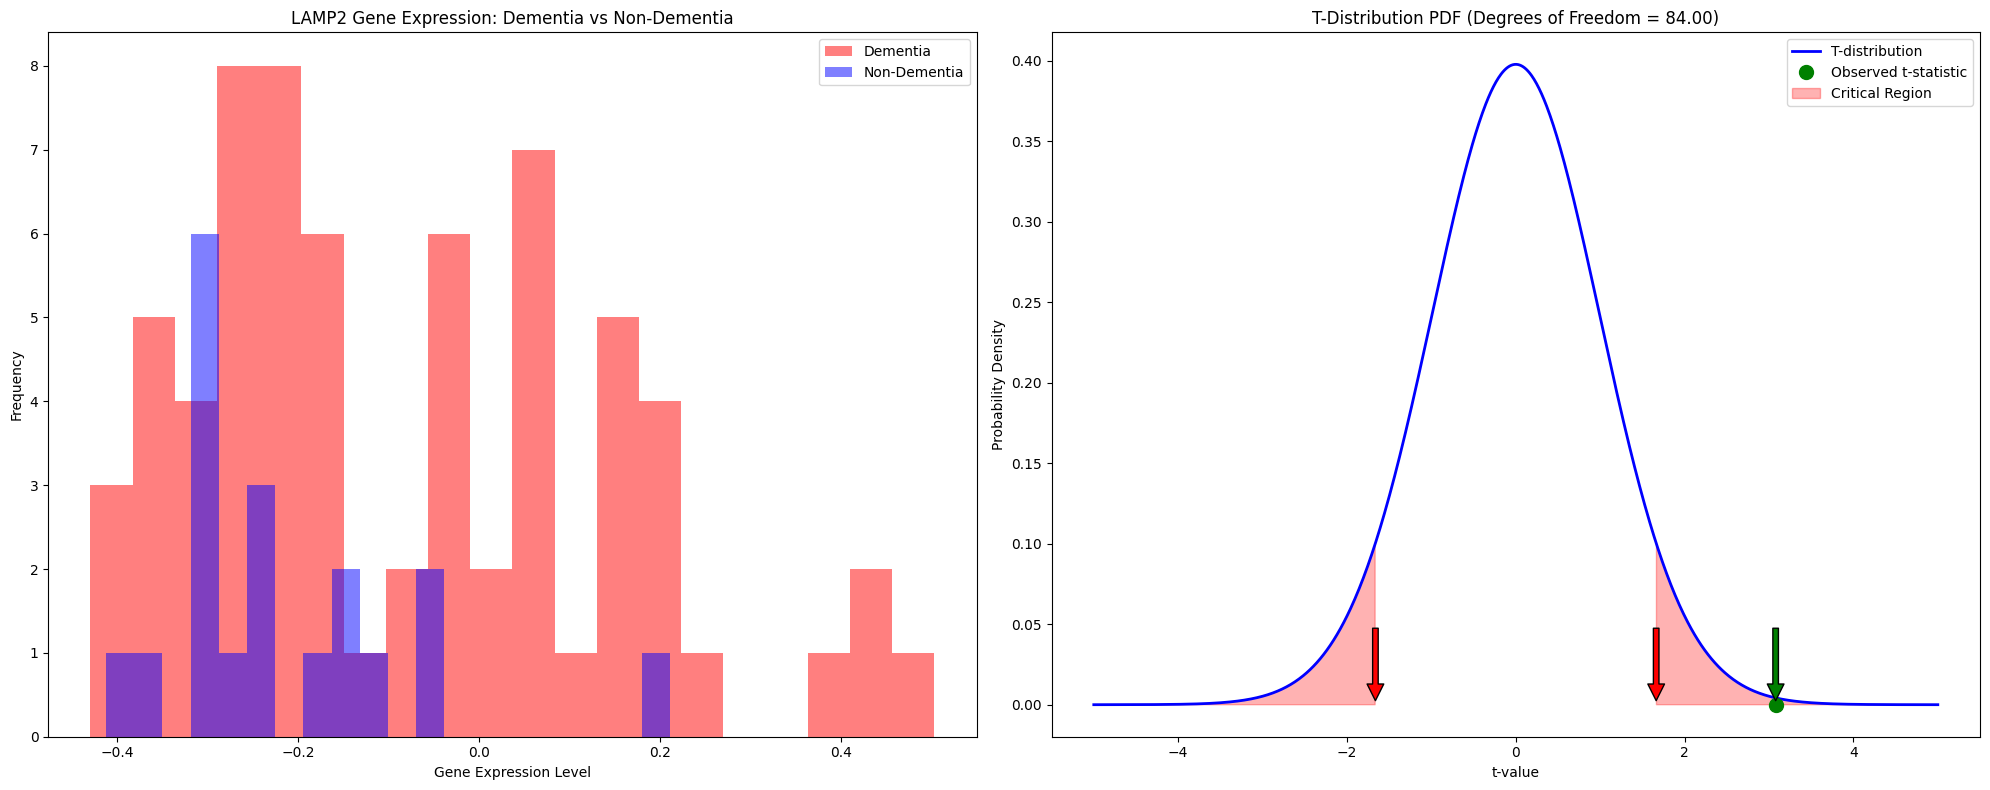

T-statistic: 3.0787356191062636
P-value: 0.0035060325814197254
Degrees of Freedom: 84


In [11]:
#Using variables from the above step
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Original Histogram Plot
ax1.hist(lamp2_dementia, bins=20, alpha=0.5, color='red', label='Dementia')
ax1.hist(lamp2_non_dementia, bins=20, alpha=0.5, color='blue', label='Non-Dementia')
ax1.set_title('LAMP2 Gene Expression: Dementia vs Non-Dementia')
ax1.set_xlabel('Gene Expression Level')
ax1.set_ylabel('Frequency')
ax1.legend()

# Perform t-Test (Hint, unequal variance, unequal sample size)
t_stat, p_value = sci.stats.ttest_ind(lamp2_dementia, lamp2_non_dementia, equal_var=False)

# The plot title for the PDF should include the calculated DF (degrees of freedom). 
degrees_of_freedom = len(lamp2_dementia) + len(lamp2_non_dementia) - 2

# "and show PDF" - second subplot
x = np.linspace(-5, 5, 1000)
y = sci.stats.t.pdf(x, degrees_of_freedom)
ax2.plot(x, y, 'b-', lw=2, label='T-distribution')
ax2.plot([t_stat], [0], 'go', markersize=10, label='Observed t-statistic')


# In the PDF plot, indicate the critical region (significance level  = 0.05) by placing two dots, arrows or lines near the x-axes
critical_value = sci.stats.t.ppf(0.95, degrees_of_freedom) 
ax2.annotate('', xy=(-critical_value, 0), xytext=(-critical_value, 0.05), arrowprops=dict(facecolor='red', shrink=0.05))
ax2.annotate('', xy=(critical_value, 0), xytext=(critical_value, 0.05), arrowprops=dict(facecolor='red', shrink=0.05))
ax2.annotate('', xy=(t_stat, 0), xytext=(t_stat, 0.05), arrowprops=dict(facecolor='green', shrink=0.05))

# You can even color the critical region (area) on the plot if you know how to do this
ax2.fill_between(x, y, where=(x <= -critical_value) | (x >= critical_value), color='red', alpha=0.3, label='Critical Region')

ax2.set_title(f"T-Distribution PDF (Degrees of Freedom = {degrees_of_freedom:.2f})")
ax2.set_xlabel("t-value")
ax2.set_ylabel("Probability Density")
ax2.legend()

plt.tight_layout()
plt.show()

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {degrees_of_freedom}")

**2.1 Using a markdown cell, state if you would reject H0 or not.**

# Hypothesis, Result, Rejection Decision 

## Hypotheses
- Null Hypothesis (H0): The mean values of gene expression between the Dementia group and Non-Dementia group among female patients are not different
- Alternative Hypothesis (H1): The mean values of gene expression between the Dementia group and Non-Dementia group among female patients are different (one could be higher or lower than the other)

## Decision Rule
Reject H0 if the p-value is less than the significance level (α = 0.05).

## Results
T-statistic: 3.0787356191062636
P-value: 0.0035060325814197254
Degrees of Freedom: 84

## Conclusion

1. If p-value < 0.05:
   We reject the null hypothesis (H0). There is sufficient evidence to conclude that there is a significant difference in the mean values of LAMP2 gene expression between the Dementia group and Non-Dementia group among female patients.

2. If p-value ≥ 0.05:
   We fail to reject the null hypothesis (H0). There is not enough evidence to conclude that there is a significant difference in the mean values of LAMP2 gene expression between the Dementia group and Non-Dementia group among female patients.

Since the p-value is less we would reject the null hypothesis. 

Step 3. Repeat Steps 1 and 2 for the gene BSN. This is to generate the second 1 x 2 plot.

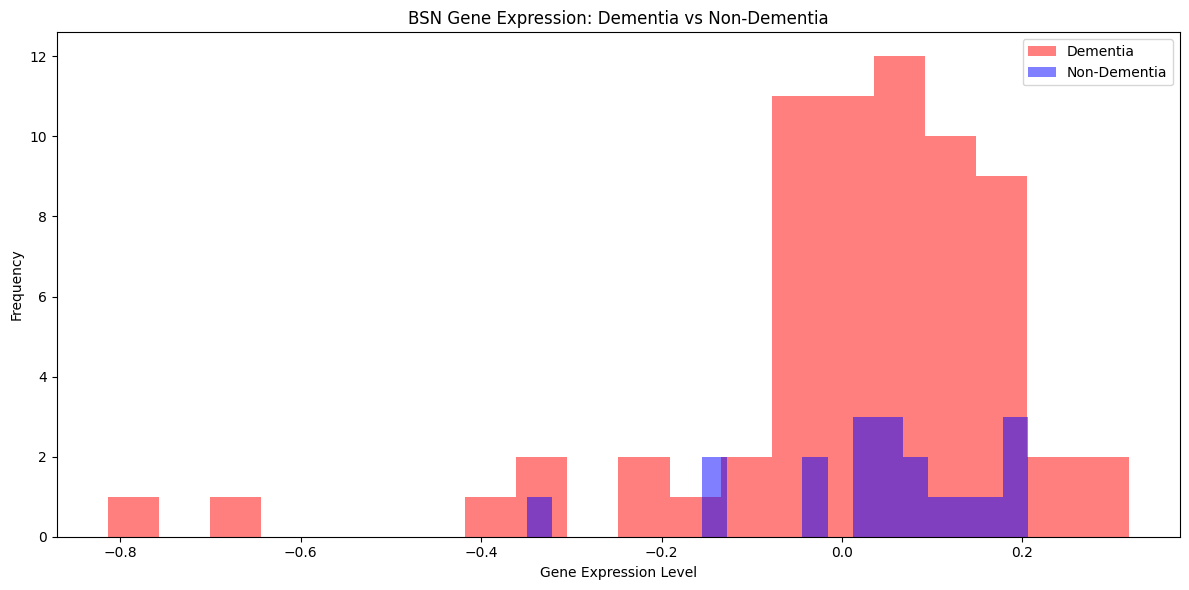

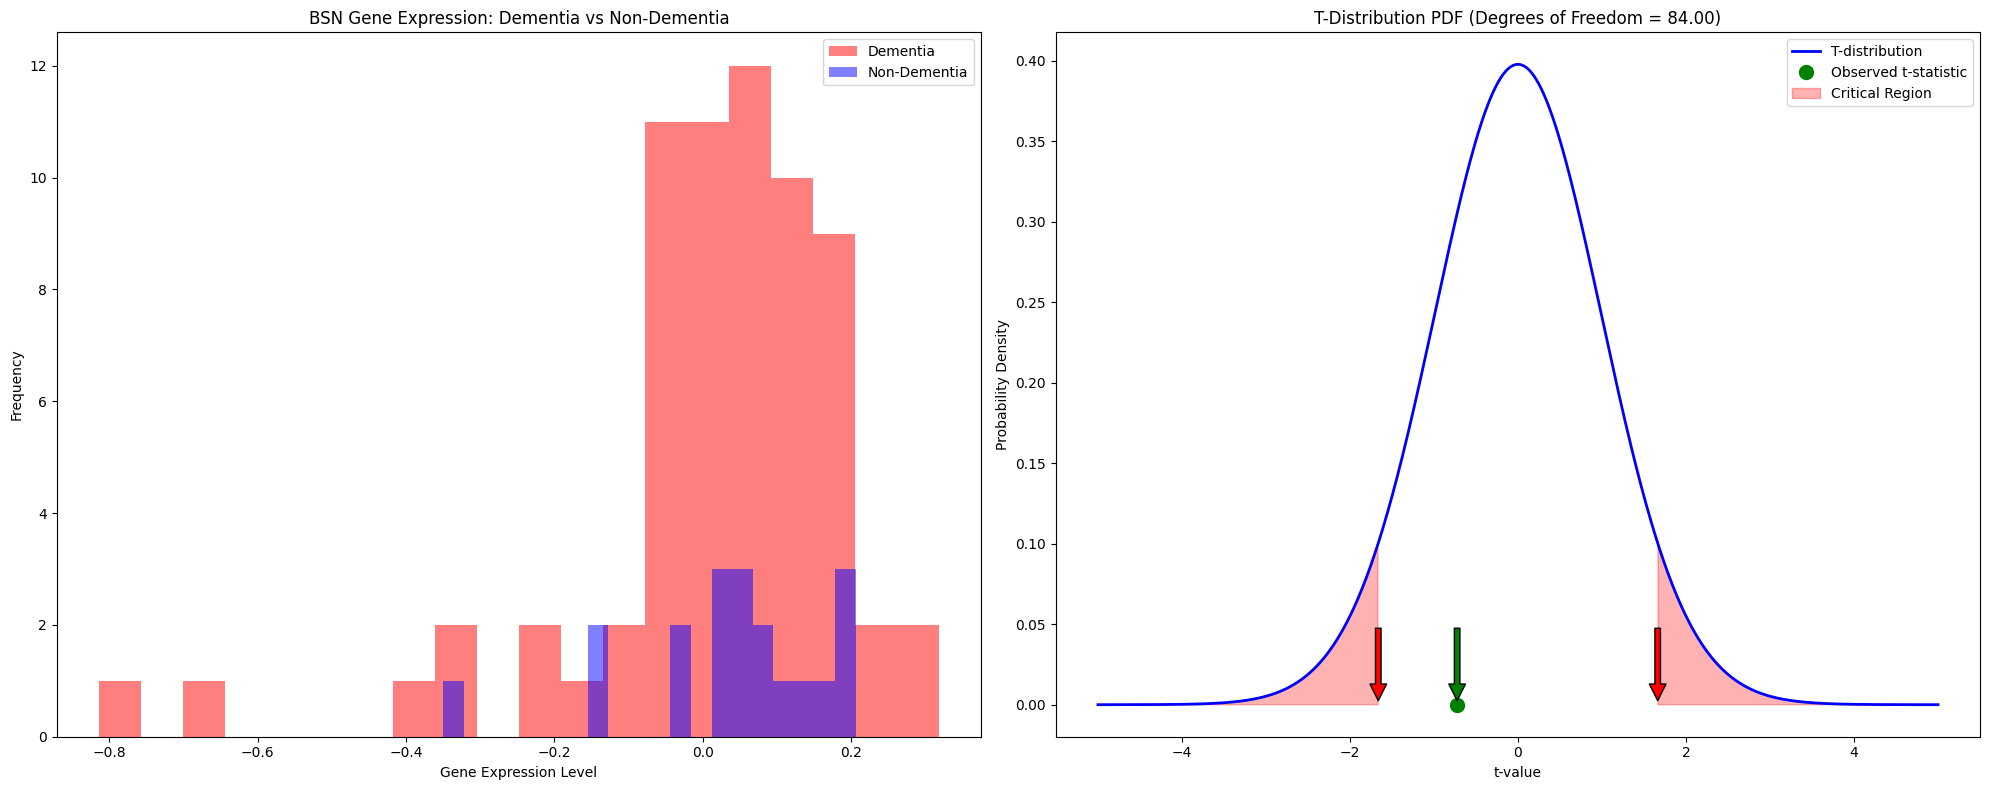

T-statistic: -0.7243529834664101
P-value: 0.47302109756690935
Degrees of Freedom: 84


In [12]:
#Load the CSV Files again from the other Homework Assignment
bsn_dementia = dementia_data['BSN']
bsn_non_dementia = non_dementia_data['BSN']

plt.figure(figsize=(12, 6))

# "Create and show two histograms overlapped in one plot for the gene BSN"
plt.hist(bsn_dementia, bins=20, alpha=0.5, color='red', label='Dementia')
plt.hist(bsn_non_dementia, bins=20, alpha=0.5, color='blue', label='Non-Dementia')

# Titling and Setup
plt.title('BSN Gene Expression: Dementia vs Non-Dementia')
plt.xlabel('Gene Expression Level')
plt.ylabel('Frequency')

plt.legend()
plt.tight_layout()
plt.show()

###

#Using variables from the above step
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Original Histogram Plot
ax1.hist(bsn_dementia, bins=20, alpha=0.5, color='red', label='Dementia')
ax1.hist(bsn_non_dementia, bins=20, alpha=0.5, color='blue', label='Non-Dementia')
ax1.set_title('BSN Gene Expression: Dementia vs Non-Dementia')
ax1.set_xlabel('Gene Expression Level')
ax1.set_ylabel('Frequency')
ax1.legend()

# Perform t-Test (Hint, unequal variance, unequal sample size)
t_stat, p_value = sci.stats.ttest_ind(bsn_dementia, bsn_non_dementia, equal_var=False)

# The plot title for the PDF should include the calculated DF (degrees of freedom). 
degrees_of_freedom = len(bsn_dementia) + len(bsn_non_dementia) - 2

# "and show PDF" - second subplot
x = np.linspace(-5, 5, 1000)
y = sci.stats.t.pdf(x, degrees_of_freedom)
ax2.plot(x, y, 'b-', lw=2, label='T-distribution')
ax2.plot([t_stat], [0], 'go', markersize=10, label='Observed t-statistic')


# In the PDF plot, indicate the critical region (significance level  = 0.05) by placing two dots, arrows or lines near the x-axes
critical_value = sci.stats.t.ppf(0.95, degrees_of_freedom) 
ax2.annotate('', xy=(-critical_value, 0), xytext=(-critical_value, 0.05), arrowprops=dict(facecolor='red', shrink=0.05))
ax2.annotate('', xy=(critical_value, 0), xytext=(critical_value, 0.05), arrowprops=dict(facecolor='red', shrink=0.05))
ax2.annotate('', xy=(t_stat, 0), xytext=(t_stat, 0.05), arrowprops=dict(facecolor='green', shrink=0.05))

# You can even color the critical region (area) on the plot if you know how to do this
ax2.fill_between(x, y, where=(x <= -critical_value) | (x >= critical_value), color='red', alpha=0.3, label='Critical Region')

ax2.set_title(f"T-Distribution PDF (Degrees of Freedom = {degrees_of_freedom:.2f})")
ax2.set_xlabel("t-value")
ax2.set_ylabel("Probability Density")
ax2.legend()

plt.tight_layout()
plt.show()

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {degrees_of_freedom}")


Step 4. Lastly, stack two 1 x 2 plots you created in Steps 1, 2 and 3 “top to bottom” to create one
2 x 2 plot and display it. Use a markdown cell and explain how to interpret/contrast the plots you
generated. For example, in which case you would reject/accept H0 and why.


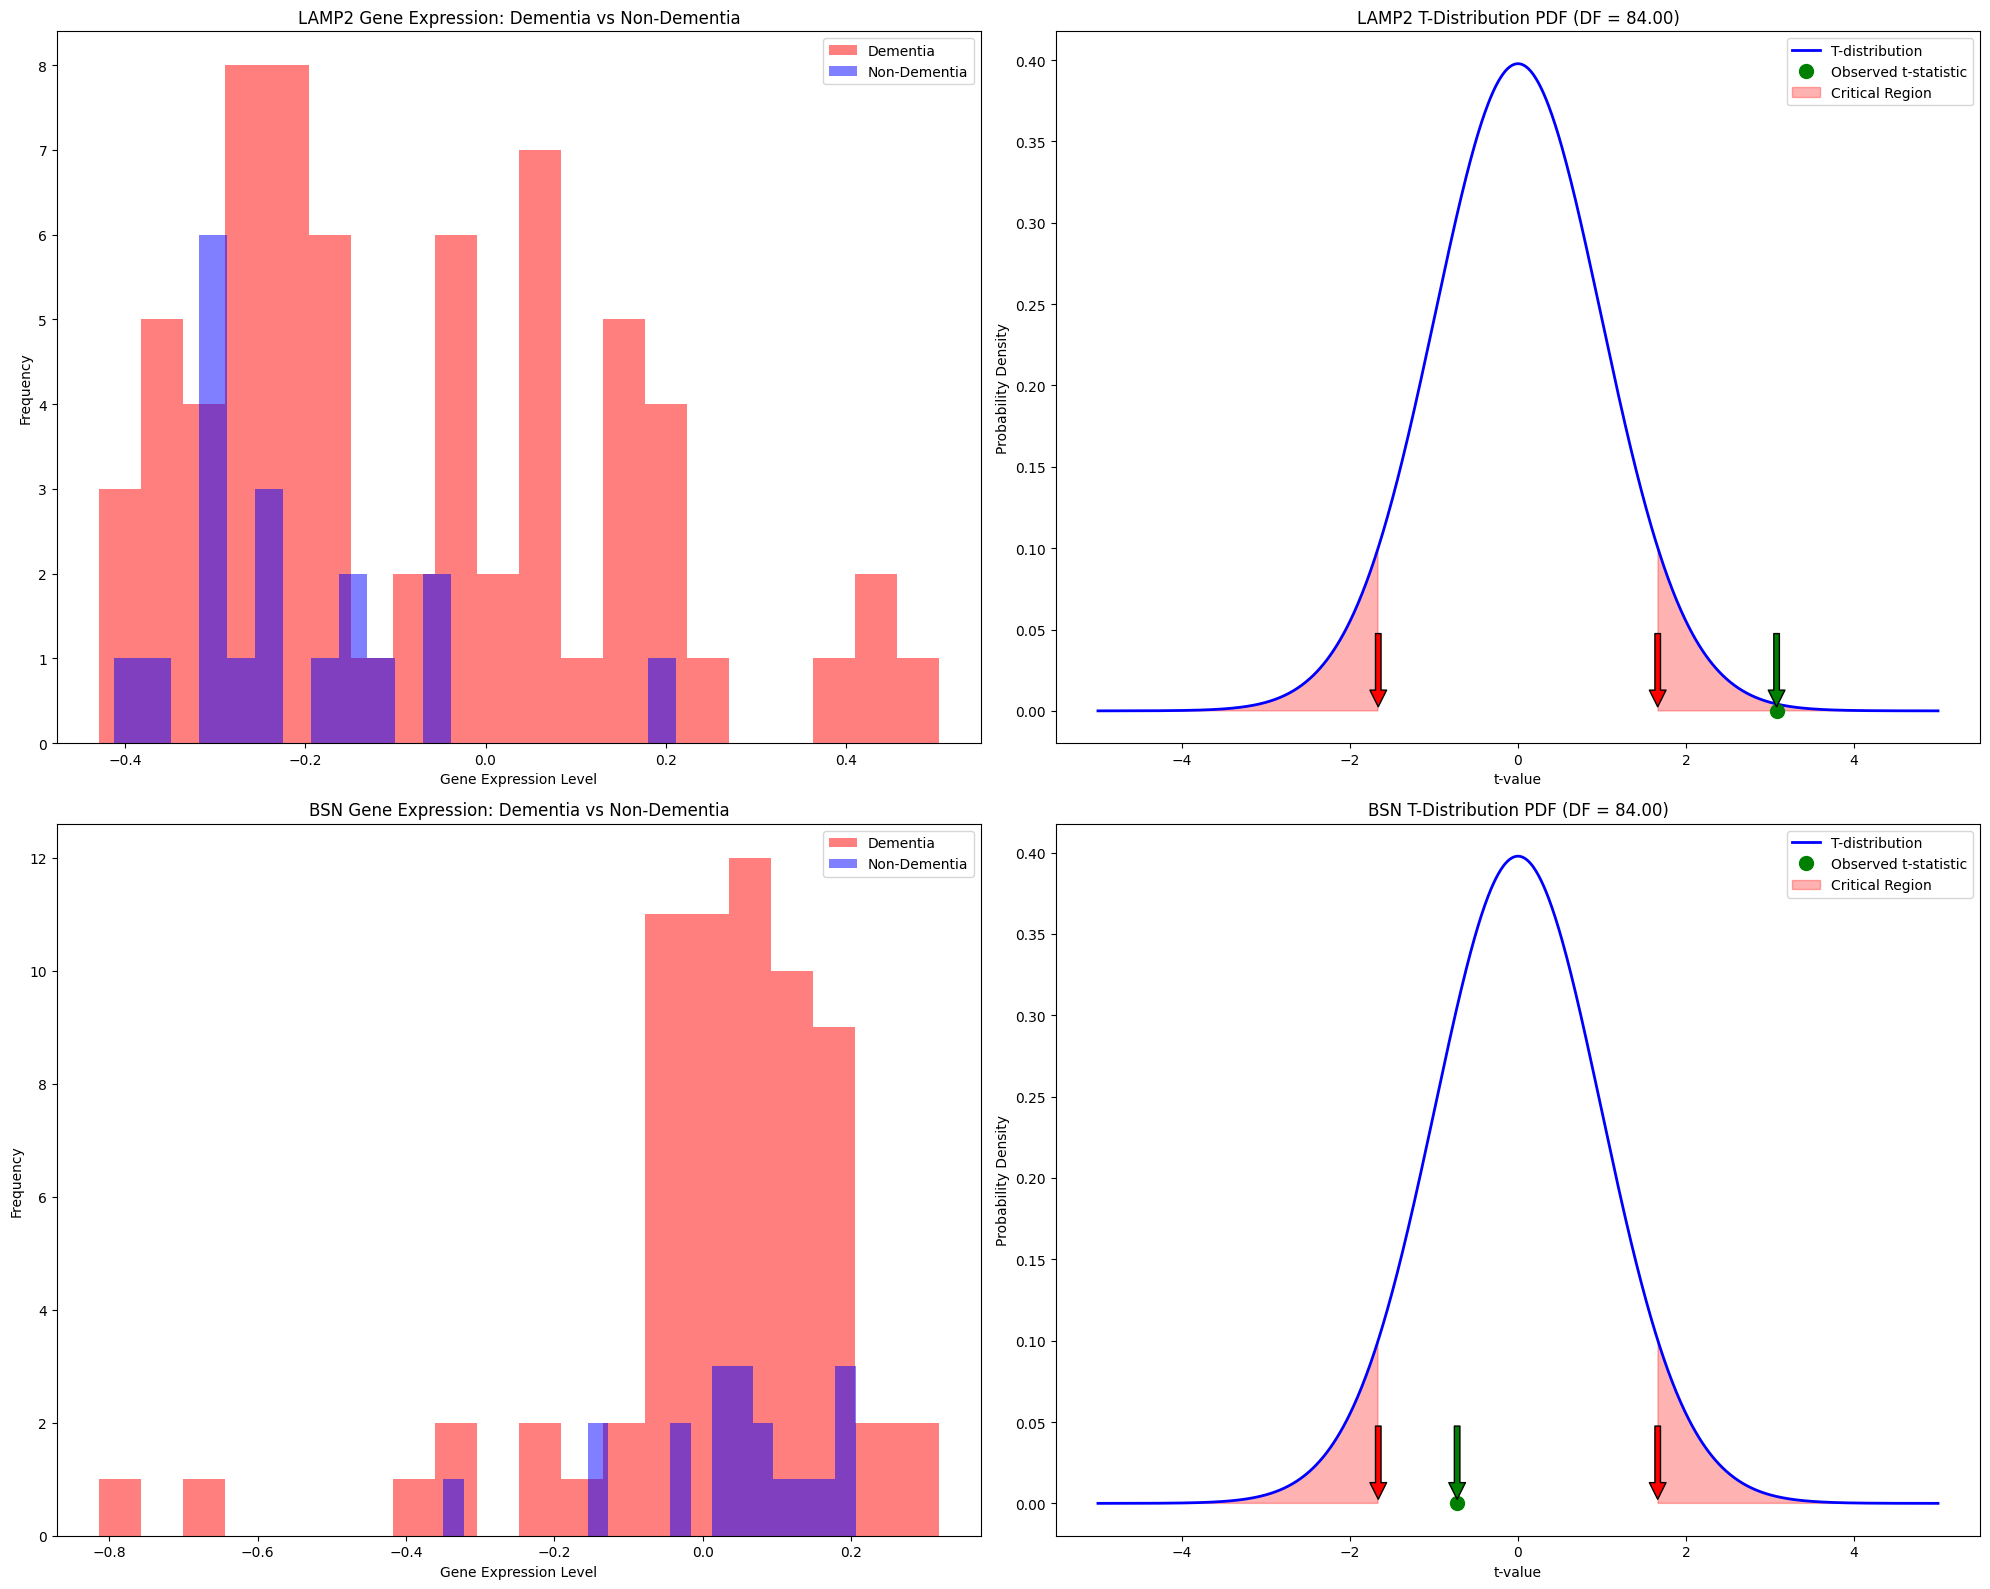

LAMP2 Results:
T-statistic: 3.0787356191062636
P-value: 0.0035060325814197254
Degrees of Freedom: 84

BSN Results:
T-statistic: -0.7243529834664101
P-value: 0.47302109756690935
Degrees of Freedom: 84


In [13]:
def analyze_gene_expression(gene_name, ax1, ax2):
    gene_dementia = dementia_data[gene_name]
    gene_non_dementia = non_dementia_data[gene_name]

    ax1.hist(gene_dementia, bins=20, alpha=0.5, color='red', label='Dementia')
    ax1.hist(gene_non_dementia, bins=20, alpha=0.5, color='blue', label='Non-Dementia')
    ax1.set_title(f'{gene_name} Gene Expression: Dementia vs Non-Dementia')
    ax1.set_xlabel('Gene Expression Level')
    ax1.set_ylabel('Frequency')
    ax1.legend()

    t_stat, p_value = sci.stats.ttest_ind(gene_dementia, gene_non_dementia, equal_var=False)
    degrees_of_freedom = len(gene_dementia) + len(gene_non_dementia) - 2

    x = np.linspace(-5, 5, 1000)
    y = sci.stats.t.pdf(x, degrees_of_freedom)
    ax2.plot(x, y, 'b-', lw=2, label='T-distribution')
    ax2.plot([t_stat], [0], 'go', markersize=10, label='Observed t-statistic')

    critical_value = sci.stats.t.ppf(0.95, degrees_of_freedom) 
    ax2.annotate('', xy=(-critical_value, 0), xytext=(-critical_value, 0.05), arrowprops=dict(facecolor='red', shrink=0.05))
    ax2.annotate('', xy=(critical_value, 0), xytext=(critical_value, 0.05), arrowprops=dict(facecolor='red', shrink=0.05))
    ax2.annotate('', xy=(t_stat, 0), xytext=(t_stat, 0.05), arrowprops=dict(facecolor='green', shrink=0.05))

    ax2.fill_between(x, y, where=(x <= -critical_value) | (x >= critical_value),color='red', alpha=0.3, label='Critical Region')

    ax2.set_title(f"{gene_name} T-Distribution PDF (DF = {degrees_of_freedom:.2f})")
    ax2.set_xlabel("t-value")
    ax2.set_ylabel("Probability Density")
    ax2.legend()

    return t_stat, p_value, degrees_of_freedom

# Create 2x2 plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# Analyze LAMP2 gene
lamp2_results = analyze_gene_expression('LAMP2', ax1, ax2)

# Analyze BSN gene
bsn_results = analyze_gene_expression('BSN', ax3, ax4)

plt.tight_layout()
plt.show()

print("LAMP2 Results:")
print(f"T-statistic: {lamp2_results[0]}")
print(f"P-value: {lamp2_results[1]}")
print(f"Degrees of Freedom: {lamp2_results[2]}")
print("\nBSN Results:")
print(f"T-statistic: {bsn_results[0]}")
print(f"P-value: {bsn_results[1]}")
print(f"Degrees of Freedom: {bsn_results[2]}")

# LAMP2 and BSN Gene Expression Analysis Interpretation
1. Histograms:
   - LAMP2: Clearly distinguished groups with and without dementia. The group with dementia expresses itself more.
   - BSN: Less separation between groups. More overlap in distributions.

2. T-Distribution PDFs:
   - LAMP2: T-statistic has a significant statistical impact that is well outside the crucial zone.
   - BSN: T-statistic nearer the center than LAMP2, but outside the crucial zone.



3. Comparison
   - Effect Size: The t-statistic and histogram separation are bigger in LAMP2 than in other models.
   - Statistical Significance: There are notable variations in both genes, with LAMP2 being more pronounced.



4. Testing Hypotheses:
   - For both genes, reject the null hypothesis (H0).
   - More proof against H0 for LAMP2 than for BSN.



5. Implications:
   - LAMP2: Possibly more strongly associated with the presence of dementia.
   - BSN: Probably has some influence, but maybe not as much as LAMP2.
   - More research should be done on both genes, but LAMP2 seems to be a particularly good option for studying dementia.

Consider the pre-processed Alzheimer data set GSE44768_CR_40_54_Combined.csv which is
available at HuskyCT. MS Excel version is also available that differentiates samples by color
highlights.

Step 1. Import and show a 40 x 54 gene expression value matrix. The row ids (sample name)
should make it clear how this matrix was created. Only 10 samples from different patients are
included in this file. Here alz/nd means dementia or no and f/m denotes gender. 

Shape of the dataframe: (40, 54)

First few rows and columns of the gene expression matrix:
                      XIST    TYROBP     DOCK2    FCER1G    GSTA4
GSM_ID                                                           
GSM1090268_alz_f  0.301474  0.209515  0.161961  0.310937 -0.17929
GSM1090271_alz_f  0.460495 -0.162170 -0.089600 -0.132010 -0.01009
GSM1090272_alz_f  0.238641  0.280428  0.313562  0.267188 -0.10473
GSM1090274_alz_f  0.276038  0.400028  0.251573  0.275051 -0.33018
GSM1090276_alz_f  0.435775 -0.293320 -0.262800 -0.138670 -0.01655

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, GSM1090268_alz_f to GSM1090318_nd_m
Data columns (total 54 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   XIST      40 non-null     float64
 1   TYROBP    40 non-null     float64
 2   DOCK2     40 non-null     float64
 3   FCER1G    40 non-null     float64
 4   GSTA4     40 non-null     float64
 5   ABCC2     40 non-null    

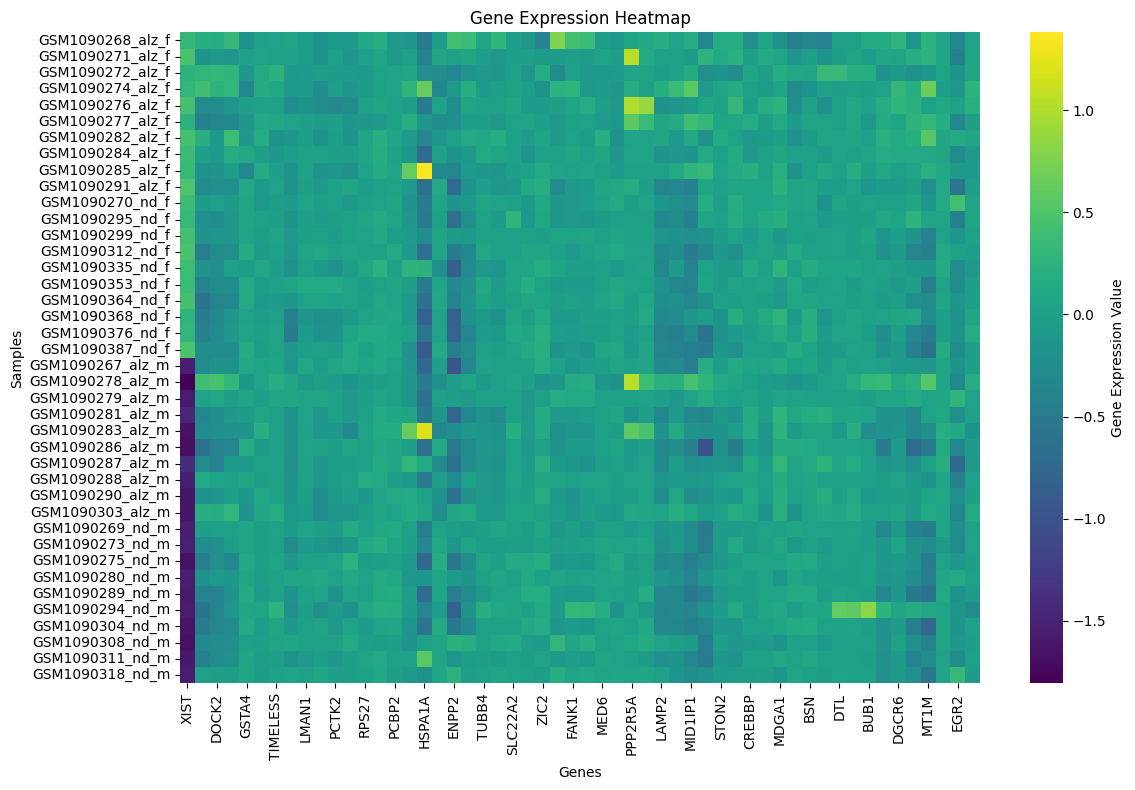

In [8]:
df = pd.read_csv('GSE44768_CR_40_54_Combined.csv', index_col=0)

# Display Requirements
print(f"Shape of the dataframe: {df.shape}")
print("\nFirst few rows and columns of the gene expression matrix:")
print(df.iloc[:5, :5])

# Daraframe Information and Statistics
print("\nDataframe Info:")
df.info()
print("\nSummary Statistics:")
print(df.describe())
print("\nUnique Sample Names:")
print(df.index.unique())
condition_counts = df.index.str.extract('(alz|nd)_(f|m)').value_counts()
print("\nSample Counts for Each Condition:")
print(condition_counts)

# gene expression value matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df, cmap='viridis', cbar_kws={'label': 'Gene Expression Value'})
plt.title('Gene Expression Heatmap')
plt.xlabel('Genes')
plt.ylabel('Samples')
plt.tight_layout()
plt.show()

**Step 2.** Perform a sample-wise hierarchal clustering using Ward method for the linkage
algorithm. Note that using Ward method can be easily done by choosing the right option from
the library. The outcome should exhibit how the 40 samples from four subgroups (Male
Dementia/ Male Non-Dementia / Female Dementia / Female Non-Dementia) are clustered. Using
a markdown cell, discuss how you would interpret the outcome, i.e., is it what you expected to
see or not, i.e., samples from each of the four groups are clustered?

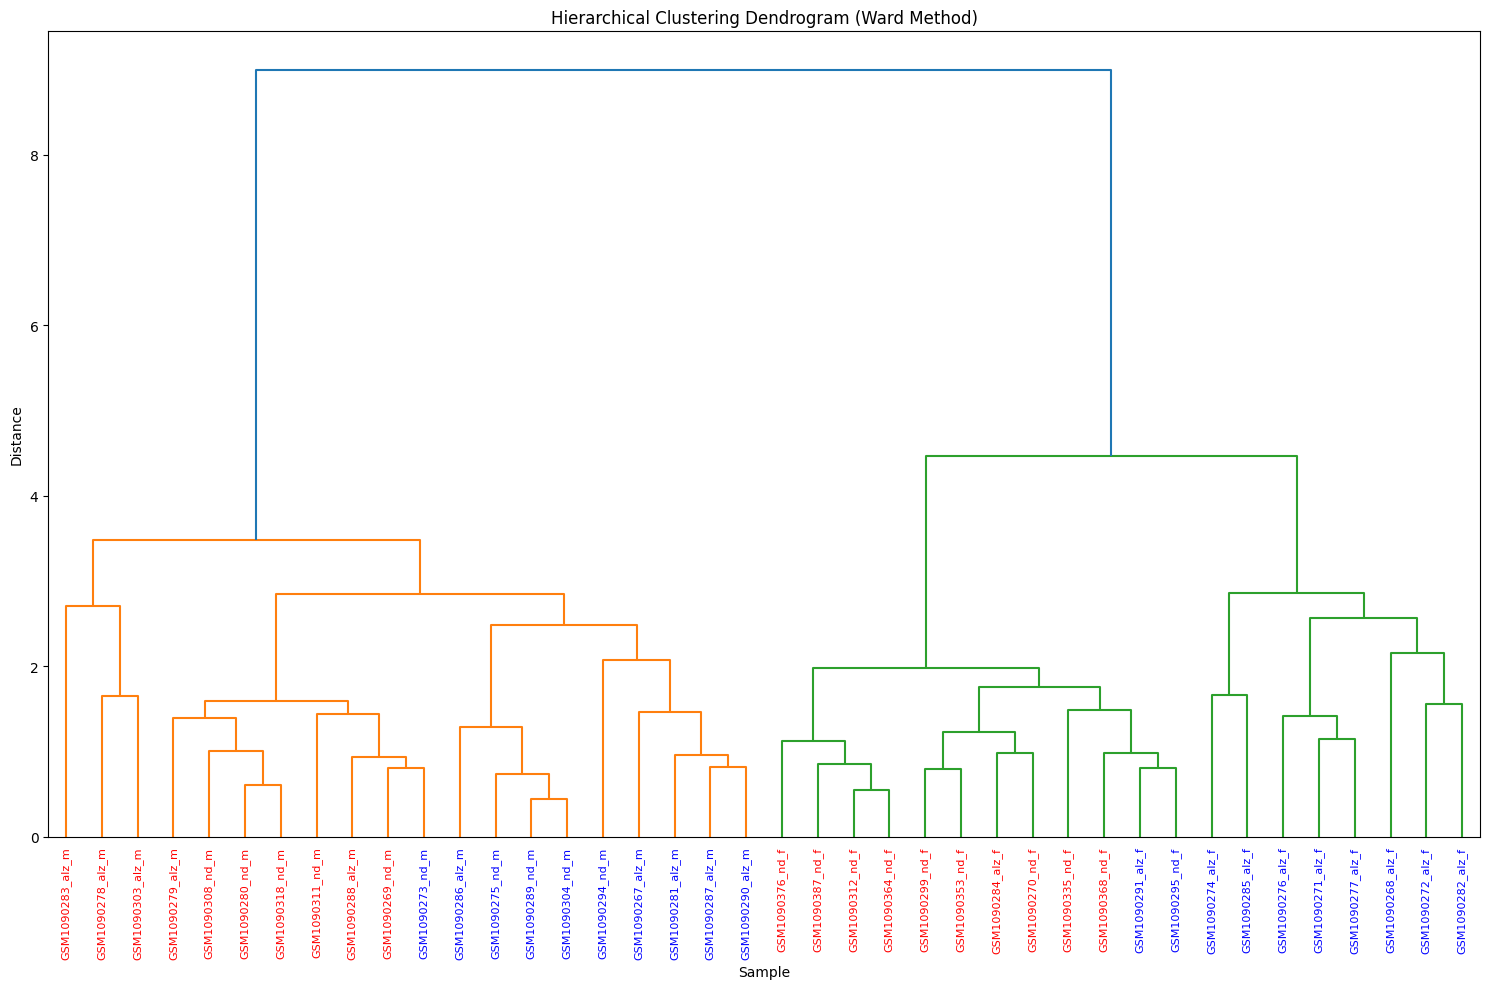

<Figure size 1500x1000 with 0 Axes>

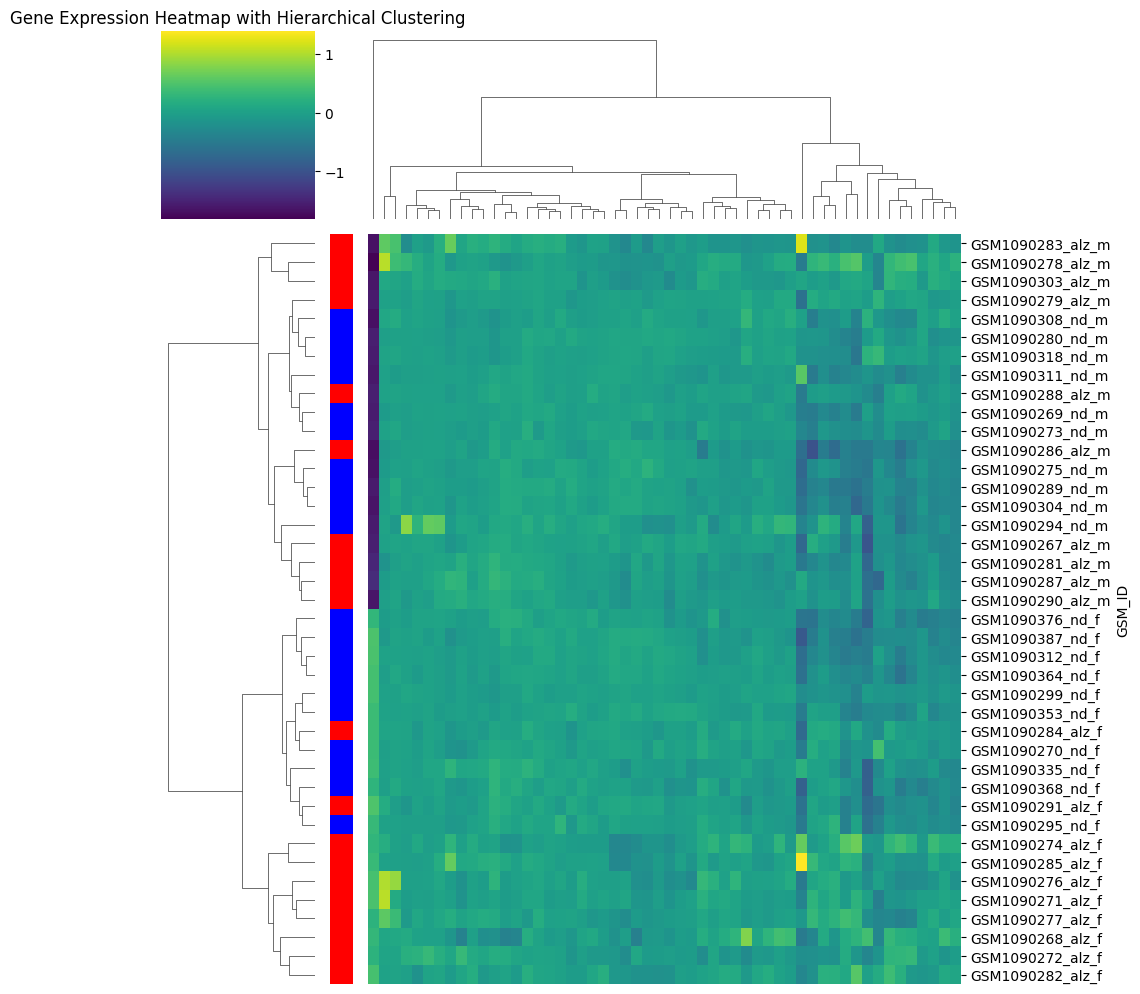

In [16]:
linkage_matrix = linkage(df, method='ward')

color_map = {'alz': '#FF0000', 'nd': '#0000FF'}

# Function to assign colors based on sample name
def get_color(name):
    if 'alz' in name:
        return color_map['alz']
    elif 'nd' in name:
        return color_map['nd']
    else:
        return '#CCCCCC'  

colors = [get_color(name) for name in df.index]

plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix, labels=df.index, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram (Ward Method)')
plt.xlabel('Sample')
plt.ylabel('Distance')

ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl, color in zip(xlbls, colors):
    lbl.set_color(color)

plt.tight_layout()
plt.show()

# Create a heatmap with hierarchical clustering
plt.figure(figsize=(15, 10))
sns.clustermap(df, method='ward', cmap='viridis', row_colors=colors, 
               yticklabels=True, xticklabels=False)
plt.title('Gene Expression Heatmap with Hierarchical Clustering')
plt.tight_layout()
plt.show()

# Interpretation of Hierarchical Clustering Results

The results we recieve using the Ward method regarding the heierarchical clustering analysis reveal these patterns:
- The dendogram shows two main clusters at the highest level, which further subdivide, suggesting that there are two primary groups of samples that are similar to each other.
- There's much more of a tendancy for Alzhiembers to cluster to itself than with non dementia. Not to say that is completely through, but it is a very pronounced separation of clusters, suggesting that the gene expression patterns are strongly influenced by the status of dementia.
- To speak on the less frequent clustering together, those do suggest that there is some significance of individual variation with the gene expression patterns, which can outweigh dementia as a status itself.
- Most came as expected, through he clustering is not as clean-cut as one might expect, with some mixing between the two groups. The results highlight the complexity of Alzheimer's disease and suggest that while gene expression patterns are strongly influenced by disease status.

In conclusion, the clustering results show a strong pattern of separation between Alzheimer's and non-dementia samples, which aligns with expectations. However, the presence of some mixed clusters underscores the complexity of the disease and the need for more sophisticated analysis methods and larger sample sizes to fully understand the genetic basis of Alzheimer's disease.

**Step 3.** Perform a gene-wise hierarchal clustering using Ward method for the linkage algorithm.
It should exhibit how the genes are clustered independent of sample group membership. Using a
markdown cell, discuss how you would interpret the outcome, i.e., do you notice formation of
any subgroups of genes behaving similarly across samples?


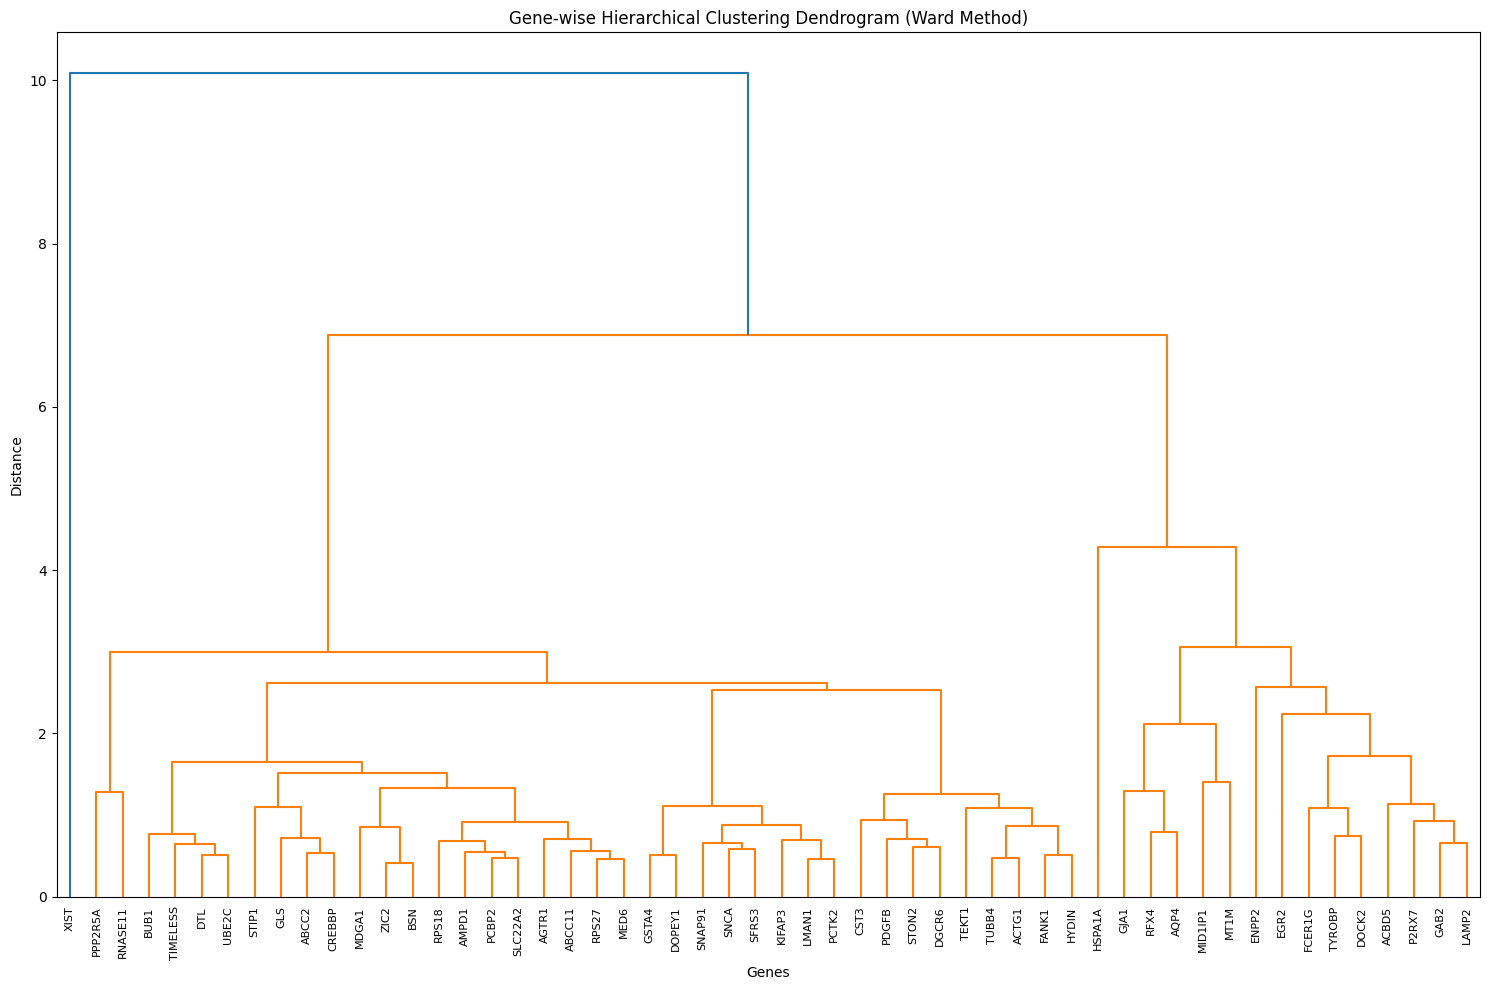

<Figure size 1500x1200 with 0 Axes>

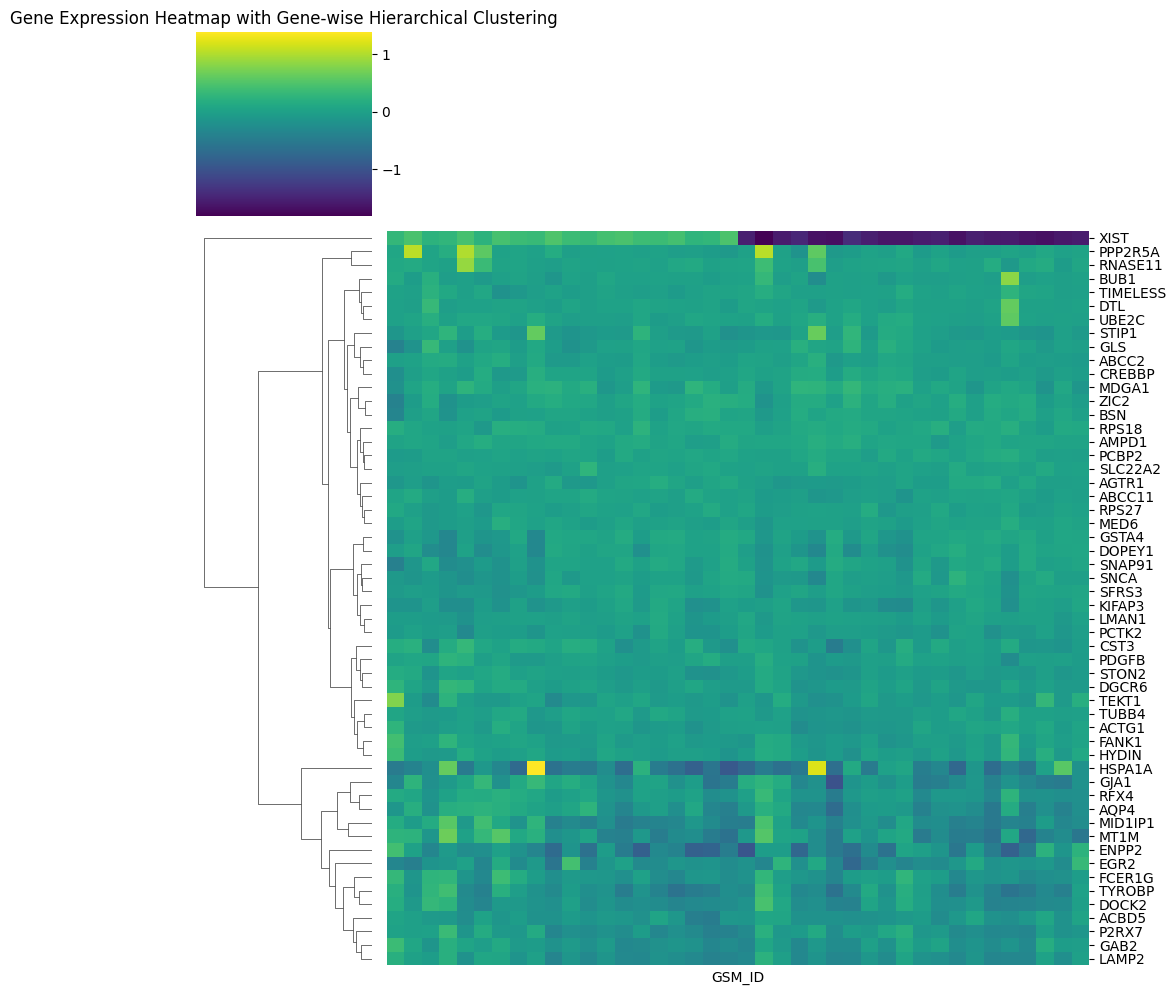


Number of clusters: 2

Genes in each main cluster:

Cluster 1:
TYROBP, DOCK2, FCER1G, GSTA4, ABCC2, TIMELESS, ACBD5, LMAN1, KIFAP3, PCTK2, SNCA, RPS27, RPS18, PCBP2, STIP1, HSPA1A, DOPEY1, ENPP2, GAB2, TUBB4, ACTG1, SLC22A2, AGTR1, ZIC2, TEKT1, FANK1, HYDIN, MED6, SFRS3, PPP2R5A, RNASE11, LAMP2, P2RX7, MID1IP1, GJA1, STON2, CST3, CREBBP, ABCC11, MDGA1, SNAP91, BSN, GLS, DTL, UBE2C, BUB1, RFX4, DGCR6, AQP4, MT1M, AMPD1, EGR2, PDGFB

Cluster 2:
XIST

Cluster sizes:
1    53
2     1
Name: count, dtype: int64


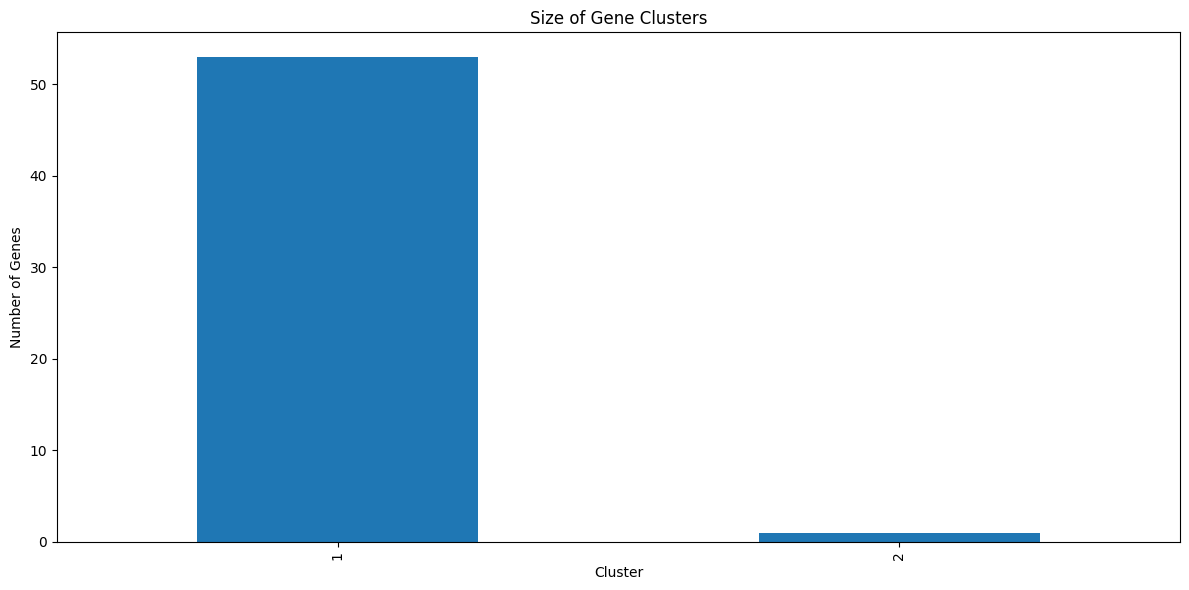

In [22]:
# gene-wise hierarchal clustering requires transposition
df_transposed = df.T

# same step but different matrix
linkage_matrix = linkage(df_transposed, method='ward')


plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix, labels=df_transposed.index, leaf_rotation=90, leaf_font_size=8)
plt.title('Gene-wise Hierarchical Clustering Dendrogram (Ward Method)')
plt.xlabel('Genes')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# hierarchical clustering
plt.figure(figsize=(15, 12))
sns.clustermap(df_transposed, method='ward', cmap='viridis', 
               yticklabels=True, xticklabels=False, 
               row_cluster=True, col_cluster=False)
plt.title('Gene Expression Heatmap with Gene-wise Hierarchical Clustering')
plt.tight_layout()
plt.show()

# Cluster Determination
distance_threshold = 0.7 * max(linkage_matrix[:, 2]) 
cluster_labels = fcluster(linkage_matrix, t=distance_threshold, criterion='distance')

clusters = pd.Series(cluster_labels, index=df_transposed.index)

n_clusters = len(set(cluster_labels))
print(f"\nNumber of clusters: {n_clusters}")

print("\nGenes in each main cluster:")
for i in range(1, n_clusters + 1): 
    print(f"\nCluster {i}:")
    print(', '.join(clusters[clusters == i].index))

cluster_sizes = clusters.value_counts().sort_index()
print("\nCluster sizes:")
print(cluster_sizes)

plt.figure(figsize=(12, 6))
cluster_sizes.plot(kind='bar')
plt.title('Size of Gene Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Genes')
plt.tight_layout()
plt.show()

The dendrogram shows different gene clusters of different sizes and expression patterns, indicating a range of co-regulation and functional groupings. The cases with bigger clusters might symbolize a general biological grouping, while smaller clusters might suggest more specialized pathways related to Alzheimer's disease. Groups of genes that were located close together are probable to share similar functions, participate in identical processes, or have coordinated regulation, potentially indicating genes consistently regulated in Alzheimer's disease. Although clustering is not based on sample groups, heatmaps could possiblyh reveal distinctions between Alzheimer's and non-dementia samples.To look to the future, more exploration of these groupings, such as analyzing functional enrichment and comparing them, may reveal significant disparities in gene control and offer important understanding into the molecular mechanism behind Alzheimer's disease.

Step 4. Perform the ultimate hierarchal clustering by performing both column-wise and genewise clustering. Again you use Ward method for the linkage algorithm. Using a markdown cell,
discuss how you would interpret the outcome. For example, can you isolate a group of
meaningful genes cutting across gender (M/F) and/or disease phenotype (Dementia/NonDementia)?

<Figure size 2000x1500 with 0 Axes>

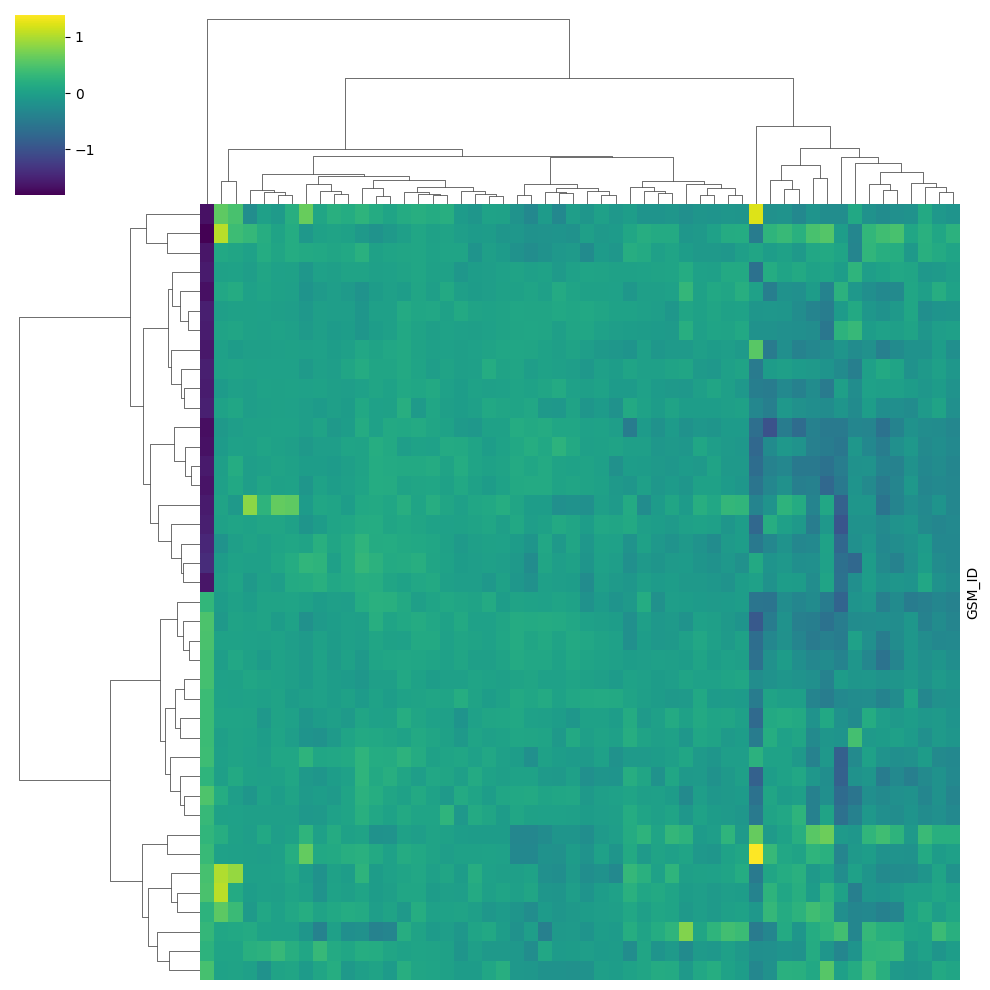

In [23]:
row_linkage = linkage(df, method='ward')
col_linkage = linkage(df.T, method='ward')

plt.figure(figsize=(20, 15))
cg = sns.clustermap(df, row_linkage=row_linkage, col_linkage=col_linkage, cmap='viridis', xticklabels=False, yticklabels=False)

row_colors = pd.Series(df.index).map(lambda x: '#FF0000' if 'alz' in x else '#0000FF')
for label, color in zip(cg.ax_heatmap.get_yticklabels(), row_colors):
    label.set_color(color)

The heatmap from hierarchical clustering shows intricate gene expression patterns in samples, with a majority of genes having consistent expression (green) and a smaller group displaying high variability (on the right). The clustering of the sample does not present distinct separations, indicating that variations in gene expression between groups (possibly disease states or genders) are complex and nuanced rather than strictly black and white. The gene clusters on the right side of the heatmap are the most intriguing targets for future research. These clusters exhibit diverse expression patterns, possibly affected by factors like disease state and gender, indicating the need for detailed differential expression and pathway analyses to reveal their biological importance.